# PHAS0007 Session 5: Notebook 2
# Fitting data with a least-squares fit: Implementation

louise.dash@ucl.ac.uk Last updated 23.10.2019

## Contents
This Session has been split into two separate notebooks. This one assumes you have already read and understood the theory presented in the first notebook.

This notebook reminds you of some of the useful numpy commands you'll need to use, and introduces you to how customize number formats in Python.

You'll then implement the equations from the first notebook, and produce a straight line fit to some real data.

# Useful Python for implementing this

### Numpy array commands:
You'll need to make use of the following numpy commands that we already met in Session 3:

* `len()`  finds the length of a list or array
* `np.min()` returns the minimum value of an array
* `np.max()` returns the maximum value of an array
* `np.mean()` returns the mean value of the elements of an array
* `np.sum()` returns the sum of the elements of the array.

## Formatting numbers for output.
Many of you will have noticed that Python's default number output doesn't always present data the way you expect or the way you want. Now we'll look at how we can customize how the data is output to the screen:

     

In [1]:
# here are some numbers
num_1 = 4.65467453905654
num_2 = -828.06548098432

# print with a defined number of decimal places: floating point numbers (f):
print("num_1 is {0:0.3f} to 3 decimal places; num_2 is {1:0.4f} to 4 decimal places.".format(num_1,num_2))

*   The `0:` and `1:` within the curly brackets specify placeholder indexes. This tells Python that we want to replace the curly brackets with the current value of a variable.

*   The `0.4f` within the curly brackets tells Python what format we want the number to be in . In this case we have specified floating-point numbers (`f`), with four decimal places (`0.4`, or just `.4`)

* The `.format(number1,number2)` after the string tells Python that the variables we want to place into the string at the placeholder indexes are `number1` (in position `0:`) and `number2` (in position `1:`).

* Therefore the text that actually appears on your plot will be something like:
"`y = 3.1234 x + 0.6789`" (with different numbers depending on your calculation, of course!)

On other occasions we might want to use `e`, for exponential/scientific format, or `d`, for (decimal) integer numbers. For example:


In [2]:
num_3 = 146.23
num_4 = 42
num_5 = 3.6589543805434e-8

print("num_3 to 4dp is {0:0.4f} (extra zeros added automatically), or rounded to an integer it's {1:0.0f}".format(num_3,num_3))
print("num_4 really is an integer: {0:d}, while num_5 is best in exponential format: {1:6.2e}".format(num_4,num_5))
print("We can put num_5 in f format {0:0.10f} but you need enough digits otherwise you just get {1:0.6f}".format(num_5,num_5))

num_3 to 4dp is 146.2300 (extra zeros added automatically), or rounded to an integer it's 146
num_4 really is an integer: 42, while num_5 is best in exponential format: 3.66e-08
We can put num_5 in f format 0.0000000366 but you need enough digits otherwise you just get 0.000000


## Why is this useful here?

Remember, when dealing with data you should quote all uncertainties in your results to 1 significant figure, and then give your measured or calculated value to the same precision (see section 5.6 of the [PHAS0007 Data Analysis Handbook](https://moodle.ucl.ac.uk/course/view.php?id=16941)).

However, if you want to do further calculations with your results, you should always use the numbers at their full calculated precision - hence the best general rule is to **_quote_ your results to 1 significant figure in the uncertainty, but always _calculate_ with the full number** to avoid any rounding errors.

In any case, you will need to output your result to full precision at some point in order to determine how many significant figures are required.

So if, for example, you've calculated your least-squares fit line to have a slope of 3.1234567 +/- 0.0023543, you should quote the result as 3.123 +/- 0.002 (not forgetting appropriate units, of course!)

Remember though, you can't use LaTeX-style formatting in a python `print()` statement, only ASCII (or if you really feel the need, Unicode) characters. It's fine to use "^" to represent a superscript and "+/-" for $\pm$, etc,  in print statements.

### Adding text directly to your plot

When you do your own least squares fit line, you're going to want to output the slope and intercept (together with their uncertainties) either as text output with a print statement, like above, or on the plot itself.

To put a text string with formatted numbers directly on your plot, you'll need to work out roughly the x- and y- coordinates where you want the text to start, then use a command like this:

    plt.text(x-coordinate, y-coordinate, "y = {0:0.4f} x + {1:0.4f}".format(slope,intercept))

You'll need to change "`x-coordinate`" and "`y-coordinate`" to the numbers corresponding to the position on the plot where you want the text, and will probably need to tweak them to get the position exactly right (make sure the text isn't obscuring anything on the plot!)

# Task: Putting this into practice

Now you're going to implement the equations from the first notebook, writing your own code to fit the best line to some data, and plot both the data and the straight line together.

<div class="alert alert-warning">
<h4> Background to the data:</h4>
<br>
<p>The data you will fit comes from the PhD research of one of our demonstrators from the 2015-2016 session: Konstantinos Konstantinou. He's now finished his PhD and moved on to <a href=https://www.ch.cam.ac.uk/group/elliott/person/kk614>greater things</a>.</p>
<br>
<p>
Konstantinos was studying how ions move through amorphous glass structures. The way the ions move affects the structural properties of the glass, and understanding this means it is possible to engineer glass with particular properties for different uses, from microelectronic devices to nuclear waste storage.</p>
<br>
<p>The data you are analysing today comes from a molecular dynamics (MD) simulation - a computational calculation of how a system of atoms or molecules evolve over time, using Newton's second law to calculate the forces on each atom due to every other atom. </p>
<br>
This particular simulation has measured how sodium ions diffuse through glass. An ion (or atom, or molecule) does not move through a substance (solid, liquid or gas) in a simple straight line, it is constantly colliding and bouncing off the other atoms it encounters on its path. If you look at the path of a single ion through the glass it would look like a random series of steps. This is basically the same phenomenon as Brownian motion, studied by Einstein in his 1905 PhD thesis. Einstein showed that the mean square displacement (MSD) (the average of the square of the distance travelled by the ion) is directly proportional to the elapsed time:

 $$MSD = \langle r^2 \rangle = 6Dt + c. $$
 
It is the constant D we are interested in, this is the diffusion coefficient and gives important information about the mobility of ions in the glass. You will notice that this equation is of the form 


and that we can therefore calculate the diffusion coefficient $D$ from the slope $m$ of the fitted line:
$$ D = \frac{m}{6}. $$
</div>

<div class="alert alert-danger">
<h1>Important:</h1>
    
<p>If you reuse code from another source, for example the session script, your own submission from a previous session, or a post on stackoverflow, you <b>must</b> make sure you clearly state the original source in the comments, and summarise any changes that you have made. </p>
    
<p>It is <b>not acceptable</b> to copy code from other sources without citation and attribution.</p>
    
<p>This applies to both session tasks and formal assignments.</p>

<h3>Examples:</h3>

<p>For example, in the task today you are asked to adapt code from your session 4 work, so include a comment in your code such as:</p>

     # Plotting code adapted from my submission for PHAS0007 Session 4
     
<p>Another example: in part 1 of the script for today's session, I used some html code to hide the python source code in the notebook. This html code was written by someone else, not me. So I included a comment: </p>

      # script in this cell is from http://blog.nextgenetics.net/?e=102
      
<p> to make it clear where I got the code from.</p>

You should **always** do this when reusing code from other sources - it is both academic good practice and useful to remind you where you found something.
  
</div>

## What you should do:

* Start with the code you wrote last session for the x-ray diffraction plot. Adapt this to read in and plot the data file "Session5data.csv", remembering the requirement given above to include comments for copied/adapted code. 

  This time, plot the data as points, without any line joining them. Check the data file itself to find out the quantities in each column and their units.
 
 
 
* Make sure that the code reads the data file from the same directory that your notebook is in. Don't make any changes to the data file itself.



* Remember to include use text cells to explain what you're doing as you go along, and to include # code comments in the code cells where appropriate. Don't forget to start with an introductory paragraph.



*  Now implement the least squares fit equations in your code, i.e. calculate

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})}; $$

$$ c = \bar{y} - m \bar{x} $$



* Also calculate the uncertainty in the slope and intercept using equations 24-26 (p38) from Dr Llorente-Garcia's PHAS0007 Data Analysis handbook (https://moodle.ucl.ac.uk/course/view.php?id=16941&section=1)
    * _Careful: the $D$ in these equations is **not** the diffusion coefficient!_



* Output, at full precision, your calculated values for the slope, the intercept, and their uncertainties, together with their units and an appropriate text string.



* Plot the fitted straight line on the same plot as the data. **_You do not need to plot the residuals or any squares on your graph - just the fitted line!_**
  * Don't forget things like units, grid, legend, etc



* Use Python number formatting to output, at the appropriate precision for quoting your results, your calculated slope and intercept, and the uncertainty in the slope and intercept, (or alternatively the equation of the straight line, including uncertainties). You can do this either
  * On your plot itself, using `plt.text()`; or
  * In a `print()` output in the same code cell as your plot (this is a bit easier, if you are short of time).


* Use your results to calculate both the diffusion coefficient $D$ and the uncertainty in  $D$ for Na ions in this glass.



* Remember to use text cells to explain what you're doing as you go along, and to include # code comments in the code cells where appropriate. Don't forget to end with a brief (sentence or short paragraph) conclusion/summary.



# Least square fitting a line onto data points 

The data is from a simulation simulating how ions move through amorphous glass structures. The data on the x axis is the simulation time, the data on the y axis is the mean square displacement of the sodium ions. All the results are quoted with the same decimal places as their errors and all the errors are quoted to one sign figure.

Importing the needed python libraries and loading the data from the provided excel.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from csv1
simTimeX, meanSqrDisplacY = np.loadtxt("Session5data.csv", delimiter=',', skiprows=1, unpack=True)

Plotting the data points.

<IPython.core.display.Javascript object>


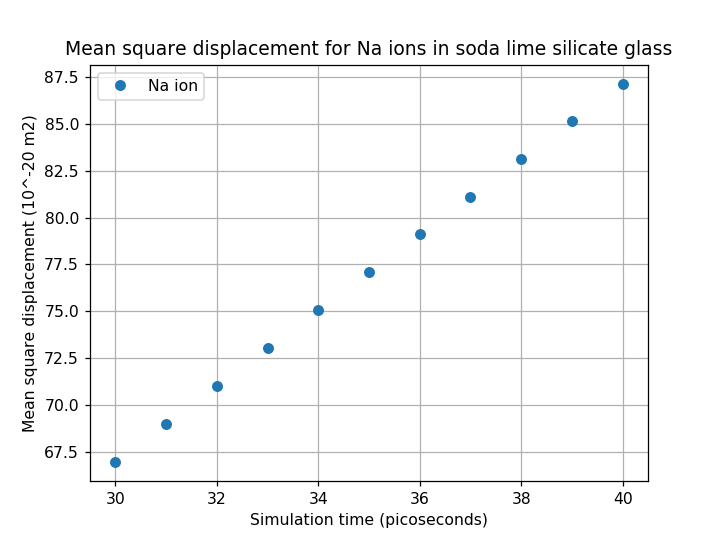

In [3]:
### The plotting in this cell is adapted from my submission for PHAS0007 Session 4

# start a new figure
plt.figure()
# add title
plt.title("Mean square displacement for Na ions in soda lime silicate glass")
# add grid lines
plt.grid(True)
# label the x and y axes
plt.xlabel("Simulation time (picoseconds)")
plt.ylabel("Mean square displacement (10^-20 m2)")

# plot the data for 
plt.plot(simTimeX, meanSqrDisplacY, "o", label="Na ion")

# locate the notation for the graph
plt.legend(loc="best")


Calculating the slope and the intercept of the fitted line along with some basic information from the data.

In [10]:
### The equations in this cell are adopted from PHAS0007-Session5-Part1 Jupyter notebook
# variable names has been changed to the ones used in this code

# basic information from the data using numpy functions
mean_X = np.mean(simTimeX)
mean_Y = np.mean(meanSqrDisplacY)
min_X = np.min(simTimeX)
max_X = np.max(simTimeX)
min_Y = np.min(meanSqrDisplacY)
max_Y = np.max(meanSqrDisplacY)
n = simTimeX.size

# calculating the slope of the line and the intercept of the line with the y axis
slope = np.sum((meanSqrDisplacY - mean_Y)*simTimeX) / np.sum((simTimeX - mean_X)*simTimeX)
intercept = mean_Y - slope*mean_X
print(slope)
print(intercept)

2.0162107560000138
6.507095135454065


Plotting the fitted line.

In [7]:
# generate a list of x-points for the fitted line
X_points = np.linspace(0,50,2)
Y_points = slope*X_points + intercept

# plot the fitted line with the previously generated dots
plt.plot(X_points, Y_points,color="#FFA500", label = "Least squares fit")
plt.legend(loc="best")

# setting which part of the x and  axes to show on Figure 3
plt.xlim(29.5,40.3)
plt.ylim(65.5,87.8)

(65.5, 87.8)

Calculating the uncertainties of the slope and the intercept. For more information about S, D and the equations used look up equations 24-26 (p38) from Dr Llorente-Garcia's PHAS0007 Data Analysis handbook

In [8]:
# calculating the uncertainty of the slope and the intercept

# calculating S and D
S = np.sum((meanSqrDisplacY-slope*simTimeX-intercept)**2)
D = np.sum((simTimeX-mean_X)**2)

#uncertainty of the slope
unc_slope = np.sqrt(S/((n-2)*D))
# uncertainty of the intercept
unc_intercept = np.sqrt(((1/n)+(mean_X**2/D))* S/(n-2))

plt.text(35, 71, "y = {0:0.3f} x + {1:0.2f} ".format(slope,intercept))

print("The slope is: {0:0.3f}m^2/s".format(slope))
print("The intercept is: {0:0.2f}m^2".format(intercept))
print("The uncertainty of the slope is: {0:0.3f}m^2/s".format(unc_slope))
print("The uncertainty of the intercept is: {0:0.2f}m^".format(unc_intercept))


The slope is: 2.016m^2/s
The intercept is: 6.51m^2
The uncertainty of the slope is: 0.001m^2/s
The uncertainty of the intercept is: 0.04m^


Calculating D for Einstein's equation  $$MSD = \langle r^2 \rangle = 6Dt + c. $$
The fitted line is in the form of:$$ y = mx + c, $$
so D is equal to: $$ D = \frac{m}{6}. $$
MSD is the mean square displacement t is the simulation time.

In [9]:
d = slope/6
print("D is equal to: {0:0.4f} ".format(d))
print("The uncertainty of D is: {0:0.4f}".format(unc_slope/6))

D is equal to: 0.3360 
The uncertainty of D is: 0.0002


We plotted the date fitted a line to it. The line seems to fit the data quite well which means that the measurements are accurate.